<a href="https://www.kaggle.com/code/patrickleal/brazilian-stadiums-analysis-viz?scriptVersionId=146182757" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **Importing libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime

# Libraries for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import warnings

# Settings the warnings to be ignored 
warnings.filterwarnings('ignore')

In [2]:
stadiums = pd.read_csv('/kaggle/input/brazilian-stadiums-dataset/brazilian-stadiums-v2_0.csv')
stadium_details = pd.read_csv('/kaggle/input/brazilian-stadiums-dataset/brazilian-stadium-details-v2_0.csv') 

# **<div id="headLink">Data Analysis </div>**

## **Questions:**

* [1) How many distinct owners are there?](#Q1)
* [2) How many stadiums per owner?](#Q2)
* [3) How many distinct Federative Units have stadiums?](#Q3)
* [4) How many cities have stadiums per FUs?](#Q4)
* [5) What is the average stadium capacity per city?](#Q5)
* [6) What is the stadium with the highest capacity per FUs?](#Q6)
* [7) Top 10  stadiums by capacity?](#Q7)
* [8) Bottom 10 stadiums by capacity?](#Q8)
* [9) Top 10 cities by the number of stadiums.](#Q9)
* [10) Bottom 10 cities by the number of stadiums.](#Q10)
* [11) Top 10 Record Attendance](#Q11)
* [12) Which are the oldest stadiums?](#Q12)
* [13) How many stadiums were inaugurated by decade?](#Q13)


### **<div id="Q1">1) How many distinct owners are there?</div>**

In [3]:
print('Count of Owners: ', stadiums['Owner'].nunique())

Count of Owners:  5


[Back to Header](#headLink)

### **<div id="Q2">2) How many stadiums per owner?</div>**

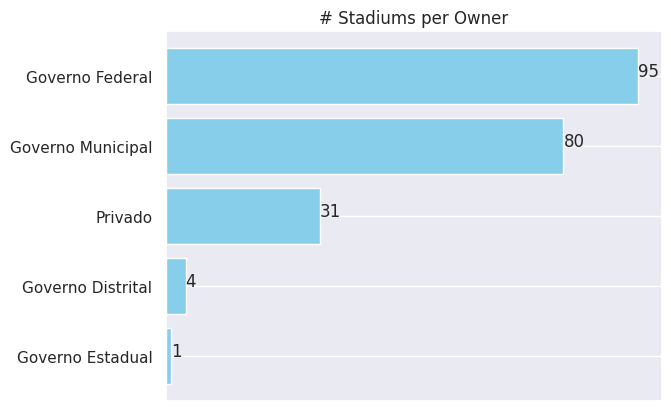

In [4]:
stadium_per_owner = pd.DataFrame(stadiums['Owner'].value_counts())
stadium_per_owner = stadium_per_owner.sort_values(by='count', ascending=True)

labels = stadiums['Owner'].unique()

plt.barh(labels, stadium_per_owner['count'], color='skyblue')
plt.title('# Stadiums per Owner')

# Remove the xticks
plt.xticks([])

# put the bar labels
for index, value in enumerate(stadium_per_owner['count']):
    plt.text(value, index, str(value), ha='left')

plt.show()

[Back to Header](#headLink)

### **<div id="Q3">3) How many distinct Federative Units have stadiums?</div>**

In [5]:
print('Count of Federative Units: ', stadiums['Federative_Units'].nunique())

Count of Federative Units:  27


All the Federative Units of Brazil have stadiums because Brazil has 27 FUs in total.

[Back to Header](#headLink)

### **<div id="Q4">4) How many cities have stadiums per FUs?</div>**

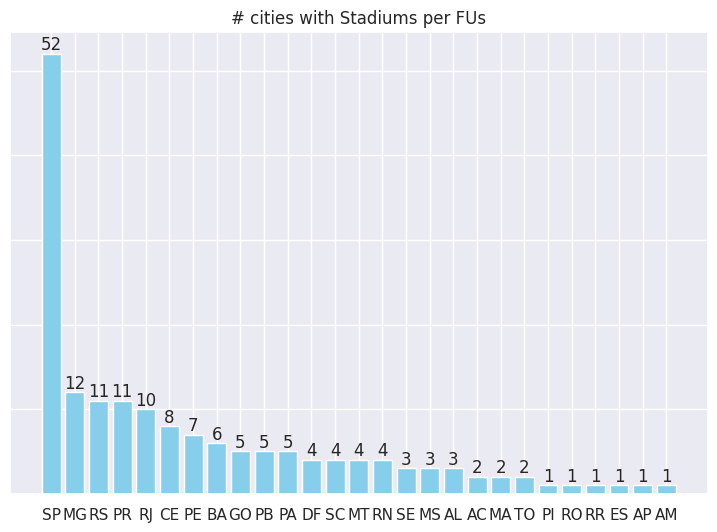

In [6]:
# create a df with the data grouped by count of unique localitys per federative units
uniq_city_per_FUs = pd.DataFrame(stadiums.groupby('Federative_Units')['Locality'].nunique())
uniq_city_per_FUs = uniq_city_per_FUs.sort_values(by='Locality', ascending=False).reset_index()

#ploting the data
fig, ax = plt.subplots(figsize=(9, 6))

bar_container = ax.bar(uniq_city_per_FUs['Federative_Units'], uniq_city_per_FUs['Locality'],
                      color='skyblue')
ax.bar_label(bar_container)

# Hiding the y-axis labels while keeping the ticks.
ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

plt.title("# cities with Stadiums per FUs")

plt.show()

[Back to Header](#headLink)

### **<div id="Q5">5) What is the average stadium capacity per city?</div>**

In [7]:
# creates a df with the data grouped by Locality
avg_capacity_per_city = stadiums.groupby('Locality')['Capacity'].describe().reset_index()
avg_capacity_per_city = avg_capacity_per_city[['Locality', 'count', 'mean']]

# analysing only the cities that have 2 or more stadiums
avg_capacity_per_city = avg_capacity_per_city[avg_capacity_per_city['count'] >= 2]

avg_capacity_per_city_top10 = avg_capacity_per_city[['Locality', 'mean']]\
                            .sort_values(by='mean', ascending=False).head(10)

avg_capacity_per_city_bottom10 = avg_capacity_per_city[['Locality', 'mean']]\
                            .sort_values(by='mean', ascending=False).tail(10)

In [8]:
# list of the colormaps i will use
colormap = ['YlGn', 'YlGn_r', 'OrRd', 'OrRd_r', 'summer', 'summer_r', 'autumn', 'autumn_r']

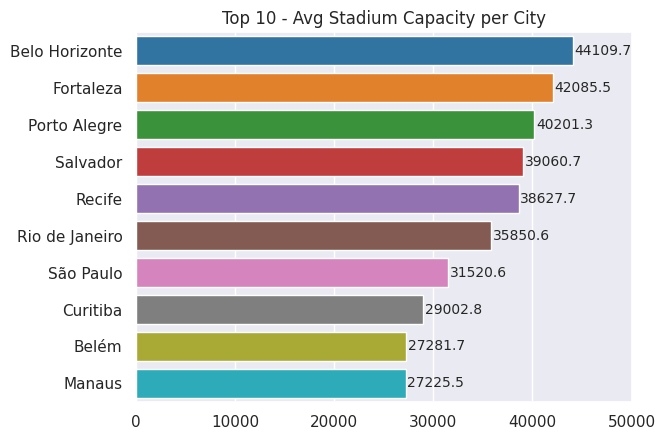

In [9]:
# ploting the data
fig, ax = plt.subplots()

sns.barplot(x='mean', y='Locality', data=avg_capacity_per_city_top10, palette='tab10')
plt.title('Top 10 - Avg Stadium Capacity per City')

ax.set(xlim=(0, 50000), ylabel="", xlabel="")

ax.bar_label(ax.containers[0], fontsize=10, padding=1)

plt.show()

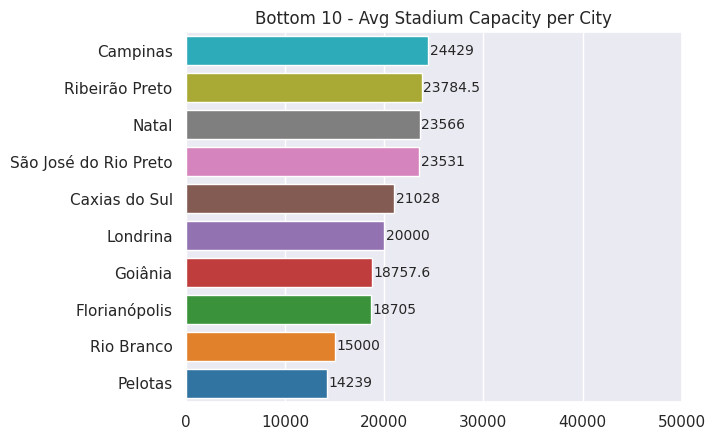

In [10]:
# ploting the data
fig, ax = plt.subplots()

sns.barplot(x='mean', y='Locality', data=avg_capacity_per_city_bottom10, palette='tab10_r')
plt.title('Bottom 10 - Avg Stadium Capacity per City')

# Keeping the same scale on the x-axis as the previous chart.
ax.set(xlim=(0, 50000), ylabel="",
      xlabel="")

ax.bar_label(ax.containers[0], fontsize=10, padding=1)

plt.show()

[Back to Header](#headLink)

### **<div id="Q6">6) What is the stadium with the highest capacity per FUs?</div>**

In [11]:
# grouping by FUs and getting the index of the largest stadiums capacity only
max_capacity_per_FUs = stadiums.loc[stadiums.groupby('Federative_Units')['Capacity'].idxmax()]\
                                                                                    .reset_index()

max_capacity_per_FUs = max_capacity_per_FUs[['Federative_Units', 'Stadium_Name', 'Capacity']]
max_capacity_per_FUs = max_capacity_per_FUs.sort_values(by='Capacity')

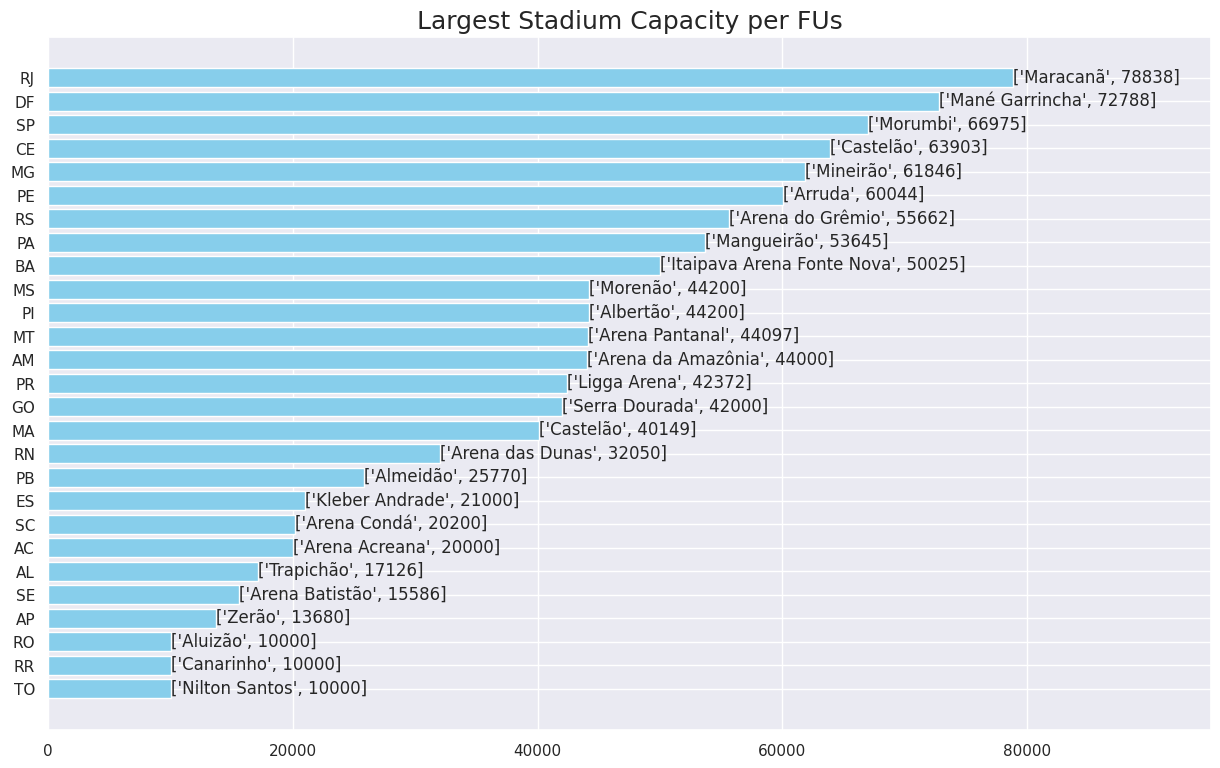

In [12]:
# creating the plot
fig, ax = plt.subplots(figsize=(15, 9))
bars = ax.barh(max_capacity_per_FUs['Federative_Units'], max_capacity_per_FUs['Capacity'], 
               color='skyblue')

# displaying the capacity and the stadium names on the bars
bar_labels = list(max_capacity_per_FUs['Stadium_Name'])
for bar, capacity, label in zip(bars, max_capacity_per_FUs['Capacity'], bar_labels):
    ax.text(capacity, bar.get_y() + bar.get_height() / 3.5 , str([label, capacity]), ha='left')

plt.title("Largest Stadium Capacity per FUs", fontsize=18)

ax.set_xlim(right=95000)

plt.show()

[Back to Header](#headLink)

### **<div id="Q7">7) Top 10 Stadiums per Capacity</div>**

In [13]:
stadiums[['Stadium_Name', 'Capacity']].sort_values(by='Capacity', ascending=False).head(10)\
                                      .style.background_gradient(cmap=colormap[5])

,Stadium_Name,Capacity
0,Maracanã,78838
1,Mané Garrincha,72788
2,Morumbi,66975
3,Castelão,63903
4,Mineirão,61846
5,Arruda,60044
6,Arena do Grêmio,55662
7,Mangueirão,53645
8,Parque do Sabiá,53350
9,Beira-Rio,50942


[Back to Header](#headLink)

### **<div id="Q8">8) Bottom 10 Stadiums per Capacity</div>**

In [14]:
stadiums[['Stadium_Name', 'Capacity']].sort_values(by='Capacity', ascending=False).tail(10)\
                                      .style.background_gradient(cmap=colormap[5])

,Stadium_Name,Capacity
193,Nogueirão,10000
192,VGD,10000
191,Vila Olímpica,10000
190,Complexo Esportivo da ULBRA,10000
189,Cristo Rei,10000
188,Estrela D'Alva,10000
187,Florestão,10000
186,Teotônio Vilela,10000
184,Arena do Calçado,10000
210,Arena do Juruá,10000


[Back to Header](#headLink)

### **<div id="Q9">9) Top 10 Cities by the number of stadiums.</div>**

In [15]:
count_stadiums_per_city = pd.DataFrame(stadiums.groupby('Locality')['Stadium_Name'].count())
count_stadiums_per_city = count_stadiums_per_city.sort_values(by='Stadium_Name', ascending=False).reset_index()
count_stadiums_per_city_top10 = count_stadiums_per_city[:10]
count_stadiums_per_city_bottom10 = count_stadiums_per_city[-10:]

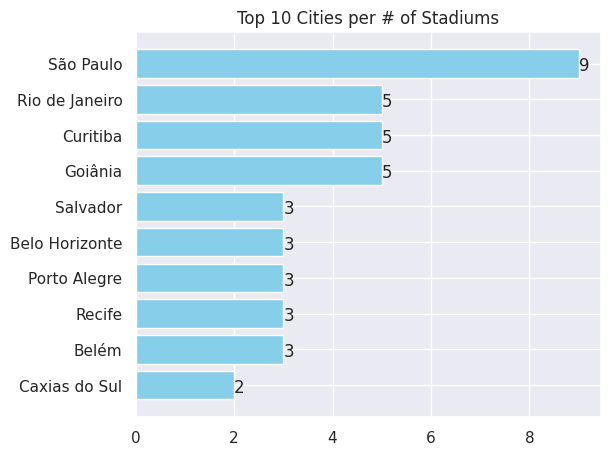

In [16]:
# ploting the data
plt.subplots(figsize=(6, 5))
count_stadiums_per_city_top10 = count_stadiums_per_city_top10.sort_values(by='Stadium_Name',
                                                                         ascending=True)
# create a ist with labels
labels = count_stadiums_per_city_top10['Locality']

plt.barh(labels, count_stadiums_per_city_top10['Stadium_Name'],
         color='skyblue')

plt.title('Top 10 Cities per # of Stadiums')

# Placing the labels on the bars.
for index, value in enumerate(count_stadiums_per_city_top10['Stadium_Name']):
    plt.text(value, index - 0.2, str(value), ha='left')

plt.show()

[Back to Header](#headLink)

### **<div id="Q10">10) Bottom 10 Cities by the number of stadiums.</div>**

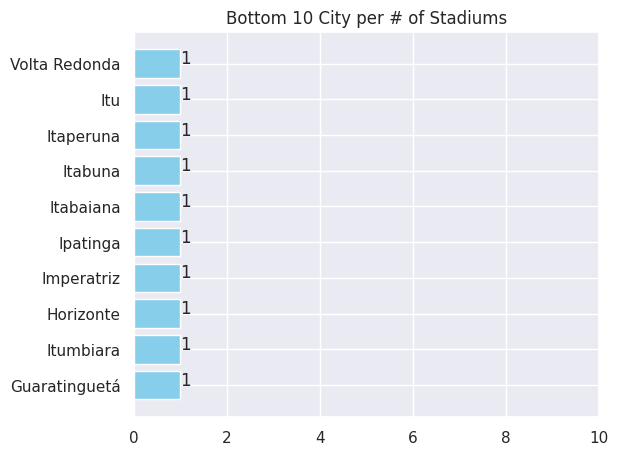

In [17]:
plt.subplots(figsize=(6, 5))
count_stadiums_per_city_bottom10 = count_stadiums_per_city_bottom10.sort_values(by='Stadium_Name',
                                                                          ascending=False)
# create a ist with labels
labels = count_stadiums_per_city_bottom10['Locality']

plt.barh(labels, count_stadiums_per_city_bottom10['Stadium_Name'],
         color='skyblue')

plt.title('Bottom 10 City per # of Stadiums')

# Keeping the same scale on the x-axis as the previous chart.
plt.xlim(0, 10)

# Placing the labels on the bars.
for index, value in enumerate(count_stadiums_per_city_bottom10['Stadium_Name']):
    plt.text(value, index, str(value), ha='left')

plt.show()

[Back to Header](#headLink)

### **<div id="Q11">11) Top 10 Record Attendance</div>**

In [18]:
stadium_details['Match_with_the_highest_attendance'] = stadium_details['Match_with_the_highest_attendance']\
                                                            .str.replace('X', ' x ').str.replace('–', ' x ')

In [19]:
# Sorting in ascending order
stadium_details[['official_name', 'record_date', 'Match_with_the_highest_attendance', 'record_attendance']]\
                .sort_values(by='record_attendance', ascending=False).head(10)\
                .style.background_gradient(cmap=colormap[5])

,official_name,record_date,Match_with_the_highest_attendance,record_attendance
0,Estádio Jornalista Mário Filho,1950-07-16,Brasil 1 x 2 Uruguai,199854
2,Estádio Cícero Pompeu de Toledo,1977-09-10,Corinthians 1 × 2 Ponte Preta,146082
4,Estádio Governador Magalhães Pinto,1997-06-22,Cruzeiro EC 1x0 Villa Nova,132834
3,Estádio Governador Plácido Castelo,1980-08-27,Brasil 1-0 Uruguai,118496
8,Estádio José Pinheiro Borda,1972-06-17,Rio Grande do Sul 3 x 3 Brasil,106554
15,Estádio Governador João Castelo,1998-09-24,Sampaio Corrêa 1x5 Santos,98720
5,Estádio Jose do rego Maciel,1993-08-29,Brasil 6 - 0 Bolívia,96990
13,Estádio do Governo do Estado de Goiás,1978-03-19,Seleção Goiana 1x3 Seleção Brasileira,77790
27,Estádio Municipal Paulo Machado de Carvalho,1977-11-12,Palmeiras 1 x 1 Santos,73532
7,Estádio Municipal Parque do Sabiá,1982-05-27,Brasil 7x0 Irlanda,72733


[Back to Header](#headLink)

### **<div id="Q12">12) Which are the oldest stadiums?</div>**

First, I need to convert the columns to the date type.

In [20]:
stadium_details['opening_date'] = pd.to_datetime(stadium_details['opening_date'])
stadium_details['record_date'] = pd.to_datetime(stadium_details['record_date'])

In [21]:
current_date = datetime.now()

In [22]:
days_in_year = 365.2425
age_df = stadium_details[['stadium_name', 'official_name', 'opening_date']]             # getting the columns i'll use
age_df['stadium_age'] = (current_date - age_df['opening_date']).dt.days // days_in_year # calculating the stadiums age
age_df['stadium_age'] = age_df['stadium_age'].astype(int)

# creting a df with the sorted data
top10_oldest = age_df.sort_values(by='stadium_age', ascending=False).head(10)           

In [23]:
top10_oldest

,stadium_name,official_name,opening_date,stadium_age
76,Estádio Boca do Lobo,Estádio Boca do Lobo,1908-10-25,114
71,Estádio Curuzu Estádio Leônidas Sodré de Castro,Estádio Leônidas Sodré de Castro,1914-06-14,109
12,Ligga Arena Estádio Joaquim Américo Guimarães,Estádio Joaquim Américo Guimarães,1914-06-09,109
39,Vila Belmiro Estádio Urbano Caldeira,Estádio Urbano Caldeira,1916-12-10,106
103,Estádio Banpará Baenão Estádio Evandro Almeida,Estádio Banpará Baenão,1917-08-15,106
81,Campos Maia Estádio José Maria de Campos Maia,Estádio Municipal José Maria de Campos Maia,1925-09-11,98
31,Estádio São Januário Estádio Vasco da Gama,Estádio Vasco da Gama,1927-04-21,96
55,Parque São Jorge Estádio Alfredo Schürig,Estádio Alfredo Schürig,1928-07-22,95
14,Estádio Couto Pereira Estádio Major Antônio C...,Estádio Major Antônio Couto Pereira,1932-11-20,90
53,Alfredo de Castilho (Alfredão) Estádio Alfredo...,Estádio Alfredo de Castilho,1935-01-08,88


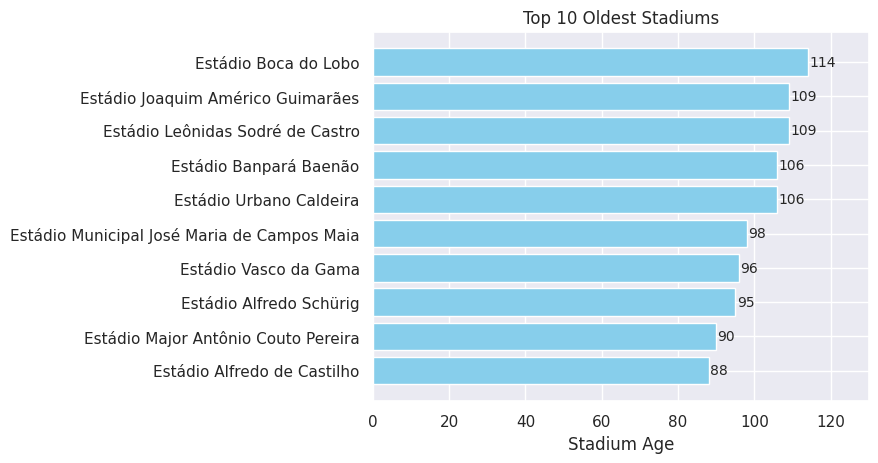

In [24]:
# Initialize the matplotlib figure
fig, ax = plt.subplots()

top10_oldest = top10_oldest.sort_values(by='stadium_age')
plt.barh(top10_oldest.official_name, top10_oldest.stadium_age, color='skyblue');
plt.title('Top 10 Oldest Stadiums')

ax.set(xlim=(0, 130), ylabel="",
      xlabel="Stadium Age")

ax.bar_label(ax.containers[0], fontsize=10, padding=1)

plt.show()

[Back to Header](#headLink)

### **<div id="Q13">13) How many stadiums were inaugurated by decade?</div>**

In [25]:
# creating a new column with the decade of the opening
age_df['decade'] = 10 * (age_df['opening_date'].dt.year // 10) 
opening_per_decades = age_df.pivot_table('official_name', index='decade', aggfunc='count').reset_index()
opening_per_decades

,decade,official_name
0,1900,1
1,1910,4
2,1920,3
3,1930,7
4,1940,11
5,1950,15
6,1960,21
7,1970,24
8,1980,19
9,1990,6


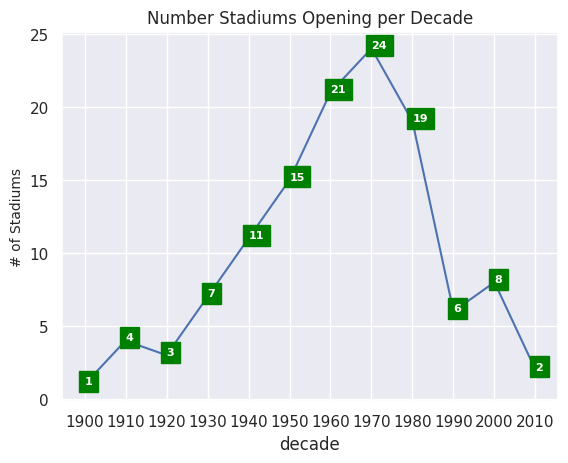

In [26]:
ax = sns.lineplot(data=opening_per_decades, x='decade', y='official_name')

plt.title("Number Stadiums Opening per Decade")
plt.xticks(opening_per_decades.decade)
plt.ylabel('# of Stadiums',size=10)

# placing the labels on the bars
for x, y in zip(opening_per_decades['decade'], opening_per_decades['official_name']):
    ax.text(x, y, str(y), ha='left', fontsize=8,
            color='white', weight='bold').set_backgroundcolor('green')
    

plt.show()

This was a basic analysis and Visualization.

Thx for your time and pls upvote the notebook

[Back to Header](#headLink)

ver.1.4